In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout 
from scipy import signal
from matplotlib import gridspec
from scipy.fft import fftshift
import warnings

############################# If you are using Mac, you may need to remove the r before the path ###############################
mag = pd.read_csv(r"C:\Users\cacam\Downloads\cal_2024-09-26T22-31-52-225.csv", skiprows = 5, delimiter=',')  
                 # Keep the quotation marks
mag.columns = ["Sample", "Time (s)", "Noise (V)", "Magnetometer Z", "Coil", "Magnetometer X", "blank"]

m = mag['Magnetometer Z']
c = mag['Coil']

############################################ This is the sample rate we used in testing ########################################
fs = 5120
############################################# If you used something else, put it here ##########################################

In [22]:
##################################################### Plot limits ##############################################################

y_max = 10e1
y_min = 10e-7 

x_max = 101
x_min = 99
###################################################### fft length ##############################################################
fft_length = 128 ## in terms of seconds

################################################# Precent FFT Overlap ##########################################################
overlap = 50 ## 50% fft overlap

Magnetometer
Frequency: [100.0066072] 
Amplitude: [0.83631793]
-------------------------
Coil
Frequency: [100.0066072] 
Amplitude: [11.33557661]


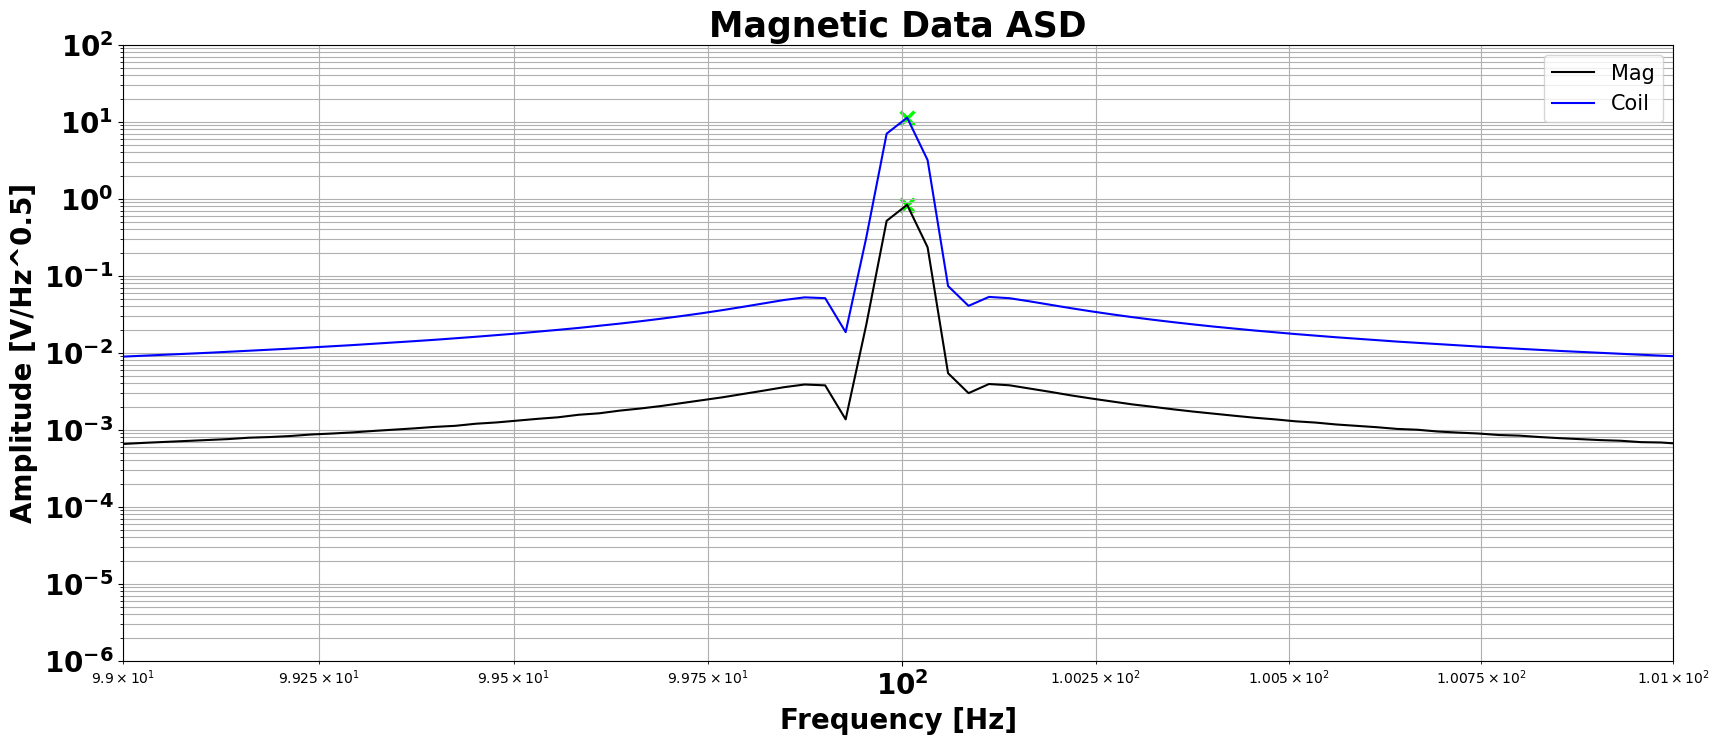

In [31]:
################################################################################################################################
######################################### The PSD is calculated via welch from scipy ###########################################
################################################################################################################################
warnings.simplefilter('ignore')

########### If you don't want to look at the whole time series, you can add '1' to the variables, i.e k1, j1, i1 ###############

f_k, Pxx_den_k = signal.welch(m, fs, window= 'hamming', nperseg= (fs *fft_length), noverlap= round(fs /(overlap *0.01)) )
f_j, Pxx_den_j = signal.welch(c, fs, window= 'hamming', nperseg= (fs *fft_length), noverlap= round(fs /(overlap *0.01)) )

################# nfft is how long the fft bin lengths, noverlap is bin overlap, window is the window used #####################
##################### We used 100 sec bins, 0.5 sec overlap, and hamming window, these can be changed ##########################
################################################ # DO NOT CHANGE/REMOVE 'fs' # #################################################


ak = np.sqrt(Pxx_den_k)
aj = np.sqrt(Pxx_den_j) ################################ This turns the PSD into an ASD ########################################

l_k = np.log(ak)
l_j = np.log(aj) ################# The log of each ASD must be found in order to find the peaks/frequences #####################

peaks_k, _ = signal.find_peaks(l_k, prominence = 13) ############# This is where the frequencies are found ####################
peaks_j, _ = signal.find_peaks(l_j, prominence = 13) ############## If some are missed or there are extra #####################


################################################################################################################################

plt.figure(figsize = (20, 8)) 

plt.scatter(f_k[peaks_k], ak[peaks_k], s = 100, color = 'lime', marker = 'x', 
            linewidths = 2.5)
plt.scatter(f_j[peaks_j], aj[peaks_j], s = 100, color = 'lime', marker = 'x', 
            linewidths = 2.5)

plt.yscale('log')
plt.xscale('log')

plt.plot(f_k, ak, color = 'black', linewidth = 1.5, label = 'Mag')
plt.plot(f_j, aj, color = 'blue', linewidth = 1.5, label = 'Coil')

plt.legend(loc = "upper right", fontsize = 15)

plt.title("Magnetic Data ASD", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [V/Hz^0.5]", fontweight = "bold", fontsize = 20)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")

plt.ylim(y_min,y_max)
plt.xlim(x_min,x_max)

plt.grid(True, which="both", ls="-")

print("Magnetometer\nFrequency: " + str(f_k[peaks_k])+ " \n" + "Amplitude: " + str(ak[peaks_k]))
print("-------------------------")
print("Coil\nFrequency: " + str(f_j[peaks_j])+ " \n" + "Amplitude: " + str(aj[peaks_j]))
#plt.savefig('**place_img_name_here.format**', bbox_inches='tight')

In [28]:
RatioOfMagnetometerPeakToCoilVoltagePeak = 0.13/2 #Enter value

VotageAcrossCalibrationResistor = 6.40 #peak-peak

MagnetometerSignalAtInjectionFrequency = RatioOfMagnetometerPeakToCoilVoltagePeak * VotageAcrossCalibrationResistor 
#peak-to-peak
CurrentThroughCalibrationCoil = VotageAcrossCalibrationResistor / 1000

MagneticFieldInCalibraionCoil = 4*np.pi * 1e-7 * 632 * CurrentThroughCalibrationCoil #Tesla
CalibrationFactor = MagneticFieldInCalibraionCoil / MagnetometerSignalAtInjectionFrequency

print("Magnetic field in calibration coil (T): ", MagneticFieldInCalibraionCoil)
print("CalibrationFactor: ", CalibrationFactor)


Magnetic field in calibration coil (T):  5.082845586095999e-06
CalibrationFactor:  1.2218378812730765e-05
